**Title** : Calculation of heat susceptibility index to measure the high night temperature tolerance in winter canola

This project aims to write the python codes to calculate the heat susceptibility indices (HSI) for yield in response to high night temperature (HNT) in winter canola genotypes. HSI is widely used to classify large number of genotypes in to tolerent and susceptible genotypes based on yield response under stressful environments. 
HSI is calculated using the following formula as by Fisher and Maurer (1978).

$$HSI = \frac{1-\frac{YD}{YP}}{D}$$

 HSI= Heat susceptibility index
 
 YD = mean of the trait for each genotype under HNT stress
 
 YP = mean of the trait for each genotype under control
 
 D = 1- [mean YD of all genotypes under HNT/mean YP of all genotypes under Control]

**Inputs**: 

This program uses a total seed weight per plant(g) data file collected from ten canola genotypes under control and HNT exposure for calculating heat susceptibility indices. The data file contains four columns: geno, trt, rep and TSW.

'geno' represents genotypes of winter canola.

'trt' represents treatments used in the experiments.
* Control (23/15°C: day/night) and HNT (23/20°C: day/night) are the two trearments.

'rep' represents the replications within the treatments.

'TSW' represents total seed weight per plant (g). 

**Outputs** 
1. Heat susceptibility index values for yield in ten canola genotypes (table).

2. Identification of tolerant and susceptible canola genotypes based on calculated HSI values.

3. Analysis of variance (ANOVA) 


**Rationale** 

I have been exploring the impact of HNT stress on various physiological and agronomic traits in diverse sets of winter canola genotypes. Calculating HSI values separately for various traits in large number of genotypes will be tedious and time consuming. This coding will also avoid the potential mannual miscalculations. Thus, this program will help me to effectively select contrasting lines using HSI values for specific trait in canola. This code might be useful for other researchers studying abiotic stress tolerance in crops.

In [92]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import MultiComparison

In [93]:
# Importing data
# Working with uploaded data files by making datasets folder in the repository 
df= pd.read_csv('datasets/HNT_TSW_Data.csv')    # Reading data using pandas
df.head(6)

,geno,trt,rep,TSW
0,Mercedes,Control,1,33.00
1,Mercedes,Control,2,34.55
2,Mercedes,Control,3,27.77
3,Mercedes,HNT,1,30.85
4,Mercedes,HNT,2,25.73
5,Mercedes,HNT,3,29.65


In [94]:
# Handling with missing values
df.isna().sum()                 # Checking missing values in the dataframe
df= df.fillna(method='pad')     # Filling missing values with immediate front values

In [74]:
# Calculating the mean of all genotypes in each treatment
df_Allgeno_means = df.groupby(["trt"]).mean()    
YP_Allgeno = df_Allgeno_means.TSW[0]             # Calculating mean of all genotypes in control treatment
YD_Allgeno = df_Allgeno_means.TSW[1]             # Calculating mean of all genotypes in HNT treatment
D = 1 - (YD_Allgeno / YP_Allgeno)                # Calcuating the value of D which is a component of HSI formula
D

0.17981350806451635

In [75]:
# Lambda function for calculating the HSI values using above formula
HSI_function = lambda YD,YP: (1-YD/YP)/D


In [76]:
# Creating a list of all canola genotypes
genotypes = df["geno"].unique()
genotypes

array(['Mercedes', 'Edimax CL', 'Popular', '46W94', 'Wichita', 'Riley',
       'DKW44-10', 'DKW46-15', 'HyCLASS225W', 'Hekip'], dtype=object)

In [129]:
# Iterating over each genotype and comput HSI
HSI_values = []
for geno in genotypes:
    idx_geno_control = (df["geno"] == geno) & (df["trt"] == "Control")
    idx_geno_hnt = (df["geno"] == geno) & (df["trt"] == "HNT")

    YP = df.loc[idx_geno_control, "TSW"].mean()
    YD = df.loc[idx_geno_hnt, "TSW"].mean()
   
    HSI = HSI_function(YD,YP);
    HSI_values.append(HSI);   

In [130]:
HSI_values

[0.5303438482288548,
 0.6701928814451251,
 0.5740752617841665,
 -0.27515366216670045,
 1.404007936488393,
 0.9680868723679961,
 1.5606477290092926,
 1.4715679780744155,
 2.513388693985206,
 0.9174214172624241]

In [97]:
# Merging two lists, genotypes and corresponding HSI values in to a data frame
HSI_table = pd.DataFrame(list(zip(genotypes, HSI_values)), columns =['genotypes', 'HSI']) 
HSI_table.head(3)

,genotypes,HSI
0,Mercedes,0.530344
1,Edimax CL,0.670193
2,Popular,0.574075


In [98]:
# For loop for assigning or identifying heat susceptibility in canola genotypes based on previous calculated HSI values 
HSI_table.insert(2,"Susceptibility", "")          # Insert a column, named 'Susceptibility' to the dataframe

# HSI < 1 is considered as tolerant and HSI > 1 is considered as susceptible, 
# So, this code separates all genotypes in to tolerant and susceptible based on HSI values 

for x in range(0,len(HSI_table)):
    if HSI_table.HSI[x] < 1:                       
        HSI_table.Susceptibility[x] = "Tolerant"
    else:
        HSI_table.Susceptibility[x] = "Susceptible"
HSI_table

C:\Users\mns_p\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\mns_p\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


,genotypes,HSI,Susceptibility
0,Mercedes,0.530344,Tolerant
1,Edimax CL,0.670193,Tolerant
2,Popular,0.574075,Tolerant
3,46W94,-0.275154,Tolerant
4,Wichita,1.404008,Susceptible
5,Riley,0.968087,Tolerant
6,DKW44-10,1.560648,Susceptible
7,DKW46-15,1.471568,Susceptible
8,HyCLASS225W,2.513389,Susceptible
9,Hekip,0.917421,Tolerant


The analysis of vaiance (ANOVA) was performed to analyze the impact of HNT on total seed weight per plant in canola genotypes.This operation also tests the usefulness of the concept of HSI to identify the tolerant and susceptible genotypes under stressful environments. The mean separation between the treatments for each genotypes was conducted to see whether the above identified tolerant and susceptible genotypes show statistical significant different among the tretments or not. 

In [86]:
# Printing some useful properties of the datasets
print(df['geno'].unique())     
print(df['trt'].unique())       
print(df['rep'].unique())      
print(df.shape) 

['Mercedes' 'Edimax CL' 'Popular' '46W94' 'Wichita' 'Riley' 'DKW44-10'
 'DKW46-15' 'HyCLASS225W' 'Hekip']
['Control' 'HNT']
[1 2 3]
(60, 4)


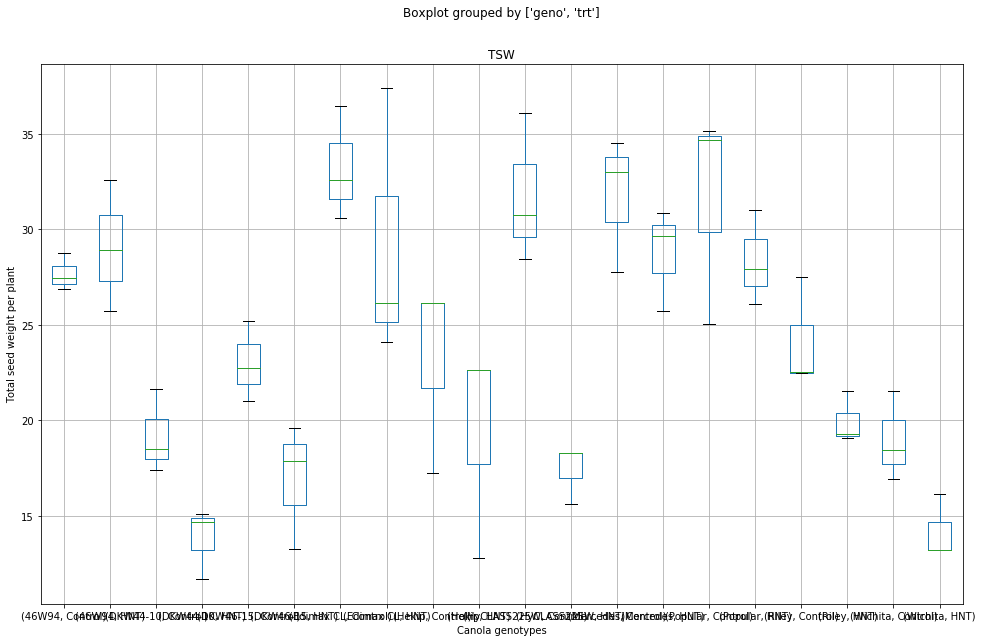

In [117]:
# Preliminery examinaion of the total seed weight per plant between the treatment for all ten genotypes using boxplots
# plt.figure(figsize=(12,8))
df.boxplot(column=['TSW'], by= ['geno','trt'], figsize=(16,10))
plt.xlabel('Canola genotypes')
plt.ylabel('Total seed weight per plant')
plt.show()

In [88]:
# ANOVA with treatments, genotypes and their interactions
formula = 'TSW ~ C(geno) + C(trt) + C(geno)* C(trt)'
model = ols(formula,data= df).fit()
anova_lm(model,type=2)

,df,sum_sq,mean_sq,F,PR(>F)
C(geno),9.0,1713.938267,190.437585,15.261340,2.217186e-10
C(trt),1.0,339.388167,339.388167,27.197983,5.950718e-06
C(geno):C(trt),9.0,208.209200,23.134356,1.853947,8.810097e-02
Residual,40.0,499.137267,12.478432,NaN,NaN


In [120]:
# Comparison of Means of total seed weight per plant between control and HNT treatments in canola genotypes 
mean_comparison= MultiComparison(df['TSW'],df['trt']).tukeyhsd(alpha=0.05)
print(mean_comparison)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
 group1 group2 meandiff lower   upper  reject
---------------------------------------------
Control  HNT   -4.7567  -8.096 -1.4173  True 
---------------------------------------------


In [ ]:
# Create a histogram to show the variations in total seed weight between control and HNT in canola genotypes